In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import simps

In [ ]:
def g (t,lamb):
  y=[]
  for time in t:
    if time<=-1:
      y.append(0.0)
    elif time>-1 and time <1:
      y.append((1-np.exp(-lamb*(time+1)))/lamb)  
    else:
      y.append((2*np.exp(-lamb*time)*np.sinh(lamb))/lamb)
  y=np.array(y)
  return y 

def exponential(x, lamb):
    return np.where(x<=0,0,np.exp(-lamb*(x)))

def rect(x):
    return np.where(abs(x)<=1.0, 1.0, 0.0)

def calc_MPE(omega,lamb):
  real=(2*lamb*np.sinc(omega/ np.pi))/(omega**2+lamb**2)
  imagin=(-2*omega*np.sinc(omega/ np.pi))/(omega**2+lamb**2)
  magnitude=np.sqrt(real**2+imagin**2)
  #magnitude=(2*np.sinc(omega/ np.pi))/np.sqrt((omega**2+lamb**2))
  phase=np.arctan2(imagin,real)
  #phase=np.arctan2(-omega*np.sinc(omega/ np.pi),lamb*np.sinc(omega/ np.pi))
  energy=(1/(2*np.pi))*magnitude**2
  return magnitude,phase,energy,real,imagin

def reconstruction(magnitude,phase,f_scale,t):
  signal_rec=[]
  for time in t:
    polar_form=magnitude*np.exp((phase+2*np.pi*f_scale*time)*1j)
    reconstruction=(1/(2*np.pi))*simps(polar_form,2*np.pi*f_scale,2*np.pi*f_scale[1]-2*np.pi*f_scale[0])
    signal_rec.append(reconstruction)
  signal_rec=np.array(signal_rec)
  return signal_rec

def plot_analysis(f_scale,magnitude,phase,energy,real,imagin,xmin,xmax):
  plt.figure(figsize=(10,8))
  plt.subplots_adjust(hspace = .001)

  ax1=plt.subplot(411)
  ax1.plot(2*np.pi*f_scale,real,'k--',label='real')
  ax1.plot(2*np.pi*f_scale,imagin,'r--',label='imaginary')
  ax1.legend()
  ax1.set_xlim(xmin,xmax)
  ax1.set_ylabel('Re{F}, Im{F}')
  ax1.set_xticklabels([])

  ax2=plt.subplot(412)
  ax2.plot(2*np.pi*f_scale,np.abs(magnitude),'k--',label='magnitude')
  ax2.set_ylabel('abs(F)')
  ax2.legend()
  ax2.set_xlim(xmin,xmax)
  ax2.set_xticklabels([])

  ax3=plt.subplot(413)
  ax3.plot(2*np.pi*f_scale,phase*(180/np.pi),'k--',label='phase[deg]')
  ax3.set_ylabel('phase')
  ax3.legend()
  ax3.set_ylim(-360,360)
  ax3.set_xlim(xmin,xmax) 
  ax3.set_xticklabels([])

  ax4=plt.subplot(414)
  ax4.plot(2*np.pi*f_scale,(1/(2*np.pi))*magnitude**2,'k--',label='energy')
  ax4.set_ylabel('abs(F)^2/2pi')
  ax4.set_xlabel('omega [rad/s]')
  ax4.legend()
  ax4.set_xlim(xmin,xmax)
  plt.savefig("ex3.png",dpi=500)


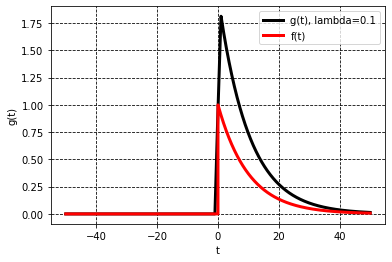

In [ ]:
fs = 1e2
dt = 1 / fs
t_min=-50
t_max=50  
lamb=0.1
number=np.ceil((t_max-t_min)/dt)

t=np.linspace(t_min,t_max,np.int(number))
f_scale = np.linspace(-40,40, t.shape[0])
omega=2*np.pi*f_scale
#_________________________________________________________
signal=g(t,lamb)

plt.plot(t,signal,'k-',lw=3,label=f"g(t), lambda={lamb}")
plt.plot(t,exponential(t,lamb),'r-',lw=3,label="f(t)")
plt.xlabel('t')
plt.ylabel('g(t)')
plt.grid(color='k',linestyle='--')
plt.legend()
plt.savefig('f_fcn.png',dpi=500)

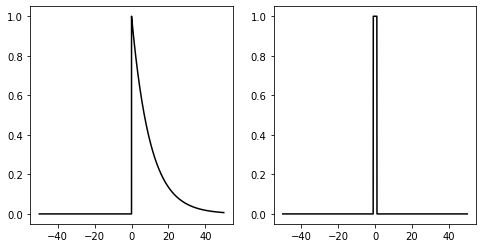

In [ ]:
fig=plt.figure(figsize=(8,4))
ax1=fig.add_subplot(121)
ax1.plot(t,exponential(t, lamb),'k-')
ax2=fig.add_subplot(122)
ax2.plot(t,rect(t),'k-')


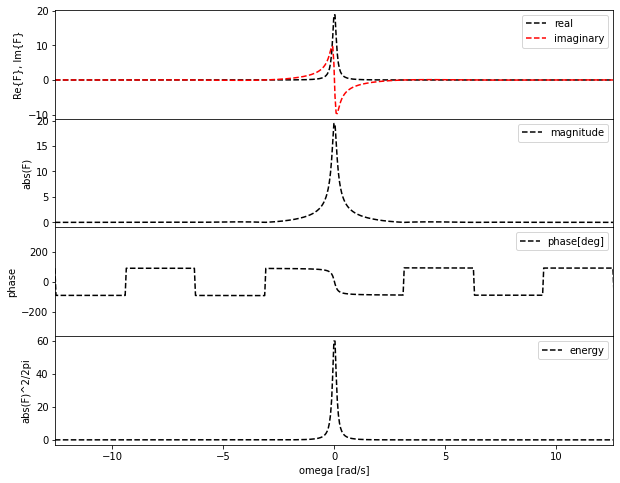

In [ ]:
magnitude,phase,energy,real,imagin=calc_MPE(omega,lamb)
plot_analysis(f_scale,magnitude,phase,energy,real,imagin,-2*np.pi*2,2*np.pi*2)

In [ ]:
signal_rec=reconstruction(magnitude,phase,f_scale,t)

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


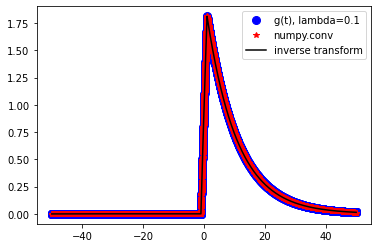

In [ ]:
f1 = exponential(t, lamb)
f2 = rect(t)
fsum1 = np.convolve(f1, f2,'same')
t_conv=np.linspace(t_min,t_max,len(fsum1))
plt.plot(t,signal,'bo',ms=8,label=f"g(t), lambda={lamb}")
plt.plot(t_conv,fsum1*(t[1]-t[0]),'r*',label='numpy.conv')
plt.plot(t,signal_rec,'k-',label='inverse transform')
#plt.xlim(-10,10)
plt.legend()

plt.savefig('comp.png',dpi=500)
